# **Running Pyspark in Colab**

* 참고주소 : https://colab.research.google.com/github/asifahmed90/pyspark-ML-in-Colab/blob/master/PySpark_Regression_Analysis.ipynb#scrollTo=sq8U3BtmhtRx

To run spark in Colab, we need to first install all the dependencies in Colab environment i.e. Apache Spark 2.3.2 with hadoop 2.7, Java 8 and Findspark to locate the spark in the system. The tools installation can be carried out inside the Jupyter Notebook of the Colab. One important note is that if you are new in Spark, it is better to avoid Spark 2.4.0 version since some people have already complained about its compatibility issue with python. 
Follow the steps to install the dependencies:

# **Colab에서 Pyspark 실행하기**

* 참고주소 : https://colab.research.google.com/github/asifahmed90/pyspark-ML-in-Colab/blob/master/PySpark_Regression_Analysis.ipynb#scrollTo=sq8U3BtmhtRx

Colab에서 스파크를 실행하려면 먼저 모든 종속성을 Colab 환경에 설치해야 합니다 (예 : Apache Spark 2.3.2 with hadoop 2.7, Java 8 및 Findspark)는 시스템에서 스파크를 찾습니다. 도구 설치는 Colab의 Jupyter 노트북 내에서 수행할 수 있습니다. 한 가지 중요한 참고 사항은 Spark를 처음 사용하는 경우 일부 사람들이 이미 Python과의 호환성 문제에 대해 불평했기 때문에 Spark 2.4.0 버전을 피하는 것이 좋습니다.
다음 단계에 따라 종속성을 설치하십시오.


In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz
!pip install -q findspark

Now that you installed Spark and Java in Colab, it is time to set the environment path which enables you to run Pyspark in your Colab environment. Set the location of Java and Spark by running the following code:


이제 Colab에 Spark와 Java를 설치 했으므로 Colab 환경에서 Pyspark를 실행할 수 있는 환경 경로를 설정할 차례입니다. 다음 코드를 실행하여 Java 및 Spark의 위치를 ​​설정합니다.

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

Run a local spark session to test your installation:

로컬 스파크 세션을 실행하여 설치를 테스트합니다.

In [6]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

---

# 10 minutes to Koalas

* 참고주소 : https://mybinder.org/v2/gh/databricks/koalas/master?filepath=docs%2Fsource%2Fgetting_started%2F10min.ipynb

This is a short introduction to Koalas, geared mainly for new users. This notebook shows you some key differences between pandas and Koalas. You can run this examples by yourself on a live notebook here. For Databricks users, you can import the current .ipynb file and run it after installing Koalas.

Customarily, we import Koalas as follows:


# 10분 코알라

* 참고주소 : https://mybinder.org/v2/gh/databricks/koalas/master?filepath=docs%2Fsource%2Fgetting_started%2F10min.ipynb

이것은 주로 신규 사용자를 대상으로 한 Koalas에 대한 짧은 소개입니다. 이 노트북은 pandas와 Koalas의 몇 가지 주요 차이점을 보여줍니다. 여기에서 라이브 노트북에서 직접이 예제를 실행할 수 있습니다. Databricks 사용자의 경우 현재 .ipynb 파일을 가져와 Koalas를 설치 한 후 실행할 수 있습니다.

일반적으로 다음과 같이 Koalas를 가져옵니다.

In [8]:
!pip install koalas

     |████████████████████████████████| 634kB 1.8MB/s 


In [9]:
import pandas as pd
import numpy as np
import databricks.koalas as ks
from pyspark.sql import SparkSession

## Object Creation
## 객체 생성

Creating a Koalas Series by passing a list of values, letting Koalas create a default integer index:

코알라 시리즈를 값의 리스트를 전달함으로써 생성하여, 코알라가 기본 정수 인덱스를 생성하도록 합니다.

In [10]:
s = ks.Series([1, 3, 5, np.nan, 6, 8])

In [11]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a Koalas DataFrame by passing a dict of objects that can be converted to series-like.

시리즈처럼 변환될 수 있는 객체의 dict를 전달함으로써 코알라 데이터 프레임을 생성합니다.

In [12]:
kdf = ks.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [13]:
kdf

,a,b,c
10,1,100,one
20,2,200,two
30,3,300,three
40,4,400,four
50,5,500,five
60,6,600,six


Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:

datetime 인덱스와 레이블이 있는 컬럼으로 numpy 배열을 전달함으로써 pandas 데이터프레임을 생성합니다.

In [14]:
dates = pd.date_range('20130101', periods=6)

In [15]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [16]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [17]:
pdf

,A,B,C,D
2013-01-01,0.246792,0.536389,0.292430,-0.593033
2013-01-02,-0.134876,1.100264,-0.311183,0.923779
2013-01-03,0.137727,0.105094,-0.970088,0.584534
2013-01-04,-0.245857,2.213910,1.932763,0.803901
2013-01-05,-0.497545,0.541320,-0.323730,-0.454794
2013-01-06,0.357657,-0.778258,-0.135661,0.905264


Now, this pandas DataFrame can be converted to a Koalas DataFrame

이제, 이 pandas 데이터프레임은 코알라 데이터프레임으로 변환될 수 있습니다.

In [18]:
kdf = ks.from_pandas(pdf)

In [19]:
type(kdf)

databricks.koalas.frame.DataFrame

It looks and behaves the same as a pandas DataFrame though

이는 pandas 데이터프레임과 똑같이 보이고 행동합니다

In [20]:
kdf

,A,B,C,D
2013-01-01,0.246792,0.536389,0.292430,-0.593033
2013-01-02,-0.134876,1.100264,-0.311183,0.923779
2013-01-03,0.137727,0.105094,-0.970088,0.584534
2013-01-04,-0.245857,2.213910,1.932763,0.803901
2013-01-05,-0.497545,0.541320,-0.323730,-0.454794
2013-01-06,0.357657,-0.778258,-0.135661,0.905264


Also, it is possible to create a Koalas DataFrame from Spark DataFrame.  

Creating a Spark DataFrame from pandas DataFrame

또한, Spark DataFrame으로부터 코알라 데이터프레임을 생성할 수 있습니다.

pandas DataFrame으로 Spark 데이터프레임을 생성합니다.

In [21]:
#spark = SparkSession.builder.getOrCreate()

In [22]:
sdf = spark.createDataFrame(pdf)

In [23]:
sdf.show()

+--------------------+-------------------+--------------------+--------------------+
|                   A|                  B|                   C|                   D|
+--------------------+-------------------+--------------------+--------------------+
|  0.2467916344312529| 0.5363885661296115| 0.29242981074832786| -0.5930334293597112|
|-0.13487637556398294| 1.1002643172222797|-0.31118252856050166|  0.9237787493823764|
| 0.13772736631889093|  0.105094112056177| -0.9700876227314351|  0.5845338086842855|
|-0.24585721059025922|  2.213909904836645|  1.9327634581838828|  0.8039009110324693|
| -0.4975445167193649| 0.5413197244143908| -0.3237299566752663|-0.45479420585587926|
| 0.35765732299914443|-0.7782577978361066| -0.1356607177712088|  0.9052638419278891|
+--------------------+-------------------+--------------------+--------------------+



Creating Koalas DataFrame from Spark DataFrame. `to_koalas()` is automatically attached to Spark DataFrame and available as an API when Koalas is imported.

Spark 데이터프레임으로부터 코알라 데이터프레임을 생성합니다. `to_koalas()`는 자동으로 Spark 데이터프레임에 접근하여 Koalas를 가져올 때 API로 사용할 수 있습니다.

In [24]:
kdf = sdf.to_koalas()

In [25]:
kdf

,A,B,C,D
0,0.246792,0.536389,0.292430,-0.593033
1,-0.134876,1.100264,-0.311183,0.923779
2,0.137727,0.105094,-0.970088,0.584534
3,-0.245857,2.213910,1.932763,0.803901
4,-0.497545,0.541320,-0.323730,-0.454794
5,0.357657,-0.778258,-0.135661,0.905264


Having specific [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes) . Types that are common to both Spark and pandas are currently supported.

특정 [dtypes](http://pandas.pydata.org/pandas-docs/stable/basics.html#basics-dtypes)가 있습니다. 현재 Spark 및 pandas에서 공통적으로 가지는 Type이 지원됩니다.

In [26]:
kdf.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

## Viewing Data
## 데이터 보기

See the [API Reference](https://koalas.readthedocs.io/en/latest/reference/index.html).

[API Reference](https://koalas.readthedocs.io/en/latest/reference/index.html)를 확인하세요.

See the top rows of the frame. The results may not be the same as pandas though: unlike pandas, the data in a Spark dataframe is not _ordered_, it has no intrinsic notion of index. When asked for the head of a dataframe, Spark will just take the requested number of rows from a partition. Do not rely on it to return specific rows, use `.loc` or `iloc` instead.

프레임의 최상단 몇개의 행을 확인합니다. 결과는 pandas와 똑같지 않을 수 있습니다. pandas와는 다르게 Spark 데이터프레임의 데이터는 _정렬되지_ 않으며 인덱스에 대한 본질적인 개념이 없습니다. dataframe의 head를 요청하면 Spark는 파티션으로부터 요청한 행의 개수를 가져(take)옵니다. 특정 행을 반환하는 데 의존하지 않으며 대신 `.loc`나 `.iloc`를 사용하세요.

In [27]:
kdf.head()

,A,B,C,D
0,0.246792,0.536389,0.292430,-0.593033
1,-0.134876,1.100264,-0.311183,0.923779
2,0.137727,0.105094,-0.970088,0.584534
3,-0.245857,2.213910,1.932763,0.803901
4,-0.497545,0.541320,-0.323730,-0.454794


Display the index, columns, and the underlying numpy data.

You can also retrieve the index; the index column can be ascribed to a DataFrame, see later

인덱스, 열(컬럼), 기본 numpy 데이터를 표시합니다.

인덱스를 받을 수도 있습니다. 인덱스 열은 데이터프레임에 속할 수 있습니다. 나중에 확인해 보겠습니다.

In [28]:
kdf.index

Int64Index([0, 1, 2, 3, 4, 5], dtype='int64')

In [29]:
kdf.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [30]:
kdf.to_numpy()

array([[ 0.24679163,  0.53638857,  0.29242981, -0.59303343],
       [-0.13487638,  1.10026432, -0.31118253,  0.92377875],
       [ 0.13772737,  0.10509411, -0.97008762,  0.58453381],
       [-0.24585721,  2.2139099 ,  1.93276346,  0.80390091],
       [-0.49754452,  0.54131972, -0.32372996, -0.45479421],
       [ 0.35765732, -0.7782578 , -0.13566072,  0.90526384]])

Describe shows a quick statistic summary of your data

Describe는 데이터의 빠른 통계 요약도 보여줍니다.

In [31]:
kdf.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.022684,0.619786,0.080755,0.361608
std,0.325851,1.000464,0.994291,0.697821
min,-0.497545,-0.778258,-0.970088,-0.593033
25%,-0.245857,0.105094,-0.323730,-0.454794
50%,-0.134876,0.536389,-0.311183,0.584534
75%,0.246792,1.100264,0.292430,0.905264
max,0.357657,2.213910,1.932763,0.923779


Transposing your data

데이터의 전치행렬도 가능합니다.

In [32]:
kdf.T

,0,1,2,3,4,5
A,0.246792,-0.134876,0.137727,-0.245857,-0.497545,0.357657
B,0.536389,1.100264,0.105094,2.213910,0.541320,-0.778258
C,0.292430,-0.311183,-0.970088,1.932763,-0.323730,-0.135661
D,-0.593033,0.923779,0.584534,0.803901,-0.454794,0.905264


Sorting by its index

인덱스를 정렬합니다.

In [33]:
kdf.sort_index(ascending=False)

,A,B,C,D
5,0.357657,-0.778258,-0.135661,0.905264
4,-0.497545,0.541320,-0.323730,-0.454794
3,-0.245857,2.213910,1.932763,0.803901
2,0.137727,0.105094,-0.970088,0.584534
1,-0.134876,1.100264,-0.311183,0.923779
0,0.246792,0.536389,0.292430,-0.593033


Sorting by value

값으로 정렬합니다.

In [34]:
kdf.sort_values(by='B')

,A,B,C,D
5,0.357657,-0.778258,-0.135661,0.905264
2,0.137727,0.105094,-0.970088,0.584534
0,0.246792,0.536389,0.292430,-0.593033
4,-0.497545,0.541320,-0.323730,-0.454794
1,-0.134876,1.100264,-0.311183,0.923779
3,-0.245857,2.213910,1.932763,0.803901


## Missing Data
## 결측치

Koalas primarily uses the value `np.nan` to represent missing data. It is by default not included in computations. 

코알라는 결측치 데이터를 표현하기 위해`np.nan` 값을 주로 사용합니다. 기본적으로 계산시 포함되지 않습니다.

In [35]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [36]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1

In [37]:
kdf1 = ks.from_pandas(pdf1)

In [38]:
kdf1

,A,B,C,D,E
2013-01-01,0.246792,0.536389,0.292430,-0.593033,1.0
2013-01-02,-0.134876,1.100264,-0.311183,0.923779,1.0
2013-01-03,0.137727,0.105094,-0.970088,0.584534,NaN
2013-01-04,-0.245857,2.213910,1.932763,0.803901,NaN


To drop any rows that have missing data.

결측치를 가진 행을 버립니다.

In [39]:
kdf1.dropna(how='any')

,A,B,C,D,E
2013-01-01,0.246792,0.536389,0.292430,-0.593033,1.0
2013-01-02,-0.134876,1.100264,-0.311183,0.923779,1.0


Filling missing data.

결측치를 특정값으로 채웁니다.

In [40]:
kdf1.fillna(value=5)

,A,B,C,D,E
2013-01-01,0.246792,0.536389,0.292430,-0.593033,1.0
2013-01-02,-0.134876,1.100264,-0.311183,0.923779,1.0
2013-01-03,0.137727,0.105094,-0.970088,0.584534,5.0
2013-01-04,-0.245857,2.213910,1.932763,0.803901,5.0


## Operations
## 연산

### Stats
### 통계

Operations in general exclude missing data.

Performing a descriptive statistic:

일반적으로 결측치를 제외한 연산을 합니다.

통계치를 묘사하는 연산을 수행합니다.

In [41]:
kdf.mean()

A   -0.022684
B    0.619786
C    0.080755
D    0.361608
dtype: float64

### Spark Configurations

Various configurations in PySpark could be applied internally in Koalas.
For example, you can enable Arrow optimization to hugely speed up internal pandas conversion. See <a href="https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html">PySpark Usage Guide for Pandas with Apache Arrow</a>.

### Spark 설정

PySpark의 다양한 설정이 코알라 내부적으로 적용될 수 있습니다.
예를 들어 내부 pandas 변환의 속도를 매우 높이기 위해 Arrow 최적화가 가능합니다. <a href="https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html">Apache Arrow로 Pandas를 위한 PySpark 사용자 가이드</a>를 확인해 주세요.

In [42]:
prev = spark.conf.get("spark.sql.execution.arrow.enabled")  # Keep its default value. 기존 값을 유지
ks.set_option("compute.default_index_type", "distributed")  # Use default index prevent overhead. 오버헤드 방지를 위해 기본 index 사용
import warnings
warnings.filterwarnings("ignore")  # Ignore warnings coming from Arrow optimizations. Arrow 최적화에서 오는 warning 무시하기.

In [43]:
spark.conf.set("spark.sql.execution.arrow.enabled", True)
%timeit ks.range(300000).to_pandas()

The slowest run took 4.29 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 286 ms per loop


In [44]:
spark.conf.set("spark.sql.execution.arrow.enabled", False)
%timeit ks.range(300000).to_pandas()

1 loop, best of 3: 1.24 s per loop


In [45]:
ks.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.enabled", prev)  # Set its default value back. 기본 값으로 다시 설정합니다.

## Grouping
By “group by” we are referring to a process involving one or more of the following steps:

- Splitting the data into groups based on some criteria
- Applying a function to each group independently
- Combining the results into a data structure

## 그룹화
“group by”는  다음 단계 중 하나 이상을 포함하는 과정을 의미합니다.

- 일부 기준에 따라 데이터를 그룹으로 분할
- 각 그룹에 독립적인 함수 적용
- 결과를 데이터 구조로 결합

In [46]:
kdf = ks.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [47]:
kdf

,A,B,C,D
0,foo,one,-0.049080,1.047839
1,bar,one,-0.047054,-0.349258
2,foo,two,-1.595671,1.756440
3,bar,three,2.167124,0.335527
4,foo,two,-0.939517,0.613638
5,bar,two,-0.257032,-1.379603
6,foo,one,-0.446948,1.938402
7,foo,three,-0.089810,2.017092


Grouping and then applying the [sum()](https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.groupby.GroupBy.sum.html#databricks.koalas.groupby.GroupBy.sum) function to the resulting groups.

[sum()](https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.groupby.GroupBy.sum.html#databricks.koalas.groupby.GroupBy.sum ) 합계 결과를 적용하고 그룹화합니다.

In [48]:
kdf.groupby('A').sum()

,C,D
A,,
bar,1.863037,-1.393334
foo,-3.121026,7.373411


Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function.

여러 열로 그룹화하면 계층적 인덱스가 형성되고 다시 sum 함수를 적용할 수 있습니다.

In [49]:
kdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one   -0.496027  2.986241
    two   -2.535188  2.370078
bar three  2.167124  0.335527
foo three -0.089810  2.017092
bar two   -0.257032 -1.379603
    one   -0.047054 -0.349258

## Plotting
## 그래프 그리기

See the <a href="https://koalas.readthedocs.io/en/latest/reference/frame.html#plotting">Plotting</a> docs.

<a href="https://koalas.readthedocs.io/en/latest/reference/frame.html#plotting">Plotting</a> 문서를 확인하세요.





In [50]:
%matplotlib inline
from matplotlib import pyplot as plt

In [51]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))

In [52]:
kser = ks.Series(pser)

In [53]:
kser = kser.cummax()

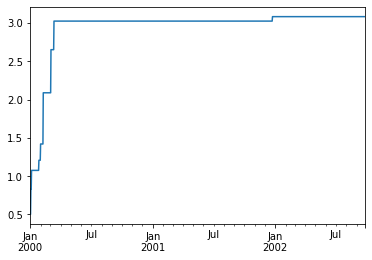

In [54]:
kser.plot()

On a DataFrame, the <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.frame.DataFrame.plot.html#databricks.koalas.frame.DataFrame.plot">plot()</a> method is a convenience to plot all of the columns with labels:

데이터 프레임에서 <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.frame.DataFrame.plot.html#databricks.koalas.frame.DataFrame.plot">plot()</a> 메소드는 레이블이 있는 모든 열을 그리는 데 편리합니다.

In [55]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [56]:
kdf = ks.from_pandas(pdf)

In [57]:
kdf = kdf.cummax()

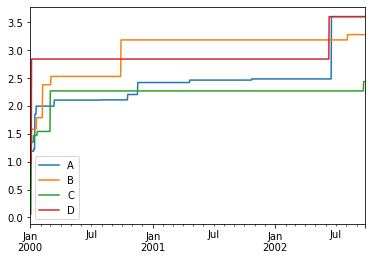

In [58]:
kdf.plot()

## Getting data in/out
## 데이터 입/출력 하기

See the <a href="https://koalas.readthedocs.io/en/latest/reference/io.html">Input/Output
</a> docs.

<a href="https://koalas.readthedocs.io/en/latest/reference/io.html">입/출력
</a> 문서를 확인하세요.

### CSV

CSV is straightforward and easy to use. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_csv.html#databricks.koalas.DataFrame.to_csv">here</a> to write a CSV file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_csv.html#databricks.koalas.read_csv">here</a> to read a CSV file.

CSV는 사용하기 쉽고 직관적입니다. CSV 파일을 쓰기 위해서는 <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_csv.html#databricks.koalas.DataFrame.to_csv">여기</a>를 확인 하시고 CSV 파일을 읽기 위해서는 <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_csv.html#databricks.koalas.read_csv">여기</a>를 확인하세요.

In [59]:
kdf.to_csv('foo.csv')
ks.read_csv('foo.csv').head(10)

,A,B,C,D
0,0.496167,0.716324,0.055572,0.956235
1,0.496167,0.716324,0.055572,0.956235
2,1.188582,0.716324,0.055572,0.956235
3,1.188582,0.763502,1.351446,0.956235
4,1.188582,1.583660,1.351446,2.841457
5,1.188582,1.583660,1.351446,2.841457
6,1.188582,1.583660,1.351446,2.841457
7,1.188582,1.583660,1.351446,2.841457
8,1.188582,1.583660,1.351446,2.841457
9,1.188582,1.583660,1.351446,2.841457


### Parquet

Parquet is an efficient and compact file format to read and write faster. See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_parquet.html#databricks.koalas.DataFrame.to_parquet">here</a> to write a Parquet file and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_parquet.html#databricks.koalas.read_parquet">here</a> to read a Parquet file.

파케이(Parquet)는 더 빠르게 읽고 쓰기 위한 효율적이며 압축된 파일 포멧입니다. 파케이 파일을 쓰기 위해서는 <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_parquet.html#databricks.koalas.DataFrame.to_parquet">여기</a>를 확인 하시고 파케이 파일을 읽기 위해서는 <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_parquet.html#databricks.koalas.read_parquet">여기</a>를 확인하세요.

In [60]:
kdf.to_parquet('bar.parquet')
ks.read_parquet('bar.parquet').head(10)

,A,B,C,D
0,0.496167,0.716324,0.055572,0.956235
1,0.496167,0.716324,0.055572,0.956235
2,1.188582,0.716324,0.055572,0.956235
3,1.188582,0.763502,1.351446,0.956235
4,1.188582,1.583660,1.351446,2.841457
5,1.188582,1.583660,1.351446,2.841457
6,1.188582,1.583660,1.351446,2.841457
7,1.188582,1.583660,1.351446,2.841457
8,1.188582,1.583660,1.351446,2.841457
9,1.188582,1.583660,1.351446,2.841457


### Spark IO

In addition, Koalas fully support Spark's various datasources such as ORC and an external datasource.  See <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_spark_io.html#databricks.koalas.DataFrame.to_spark_io">here</a> to write it to the specified datasource and <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_spark_io.html#databricks.koalas.read_spark_io">here</a> to read it from the datasource.

추가적으로 코알라는 ORC나 외부 데이터소스 같은 Spark의 다양한 데이터소스를 완전 지원합니다. 특정 데이터소스로 쓰기 위해서 <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.DataFrame.to_spark_io.html#databricks.koalas.DataFrame.to_spark_io">여기</a>를 확인 하시고 특정 데이터소스로부터 읽기 위해서 <a href="https://koalas.readthedocs.io/en/latest/reference/api/databricks.koalas.read_spark_io.html#databricks.koalas.read_spark_io">여기</a>를 확인해 주세요.

In [61]:
kdf.to_spark_io('zoo.orc', format="orc")
ks.read_spark_io('zoo.orc', format="orc").head(10)

,A,B,C,D
0,0.496167,0.716324,0.055572,0.956235
1,0.496167,0.716324,0.055572,0.956235
2,1.188582,0.716324,0.055572,0.956235
3,1.188582,0.763502,1.351446,0.956235
4,1.188582,1.583660,1.351446,2.841457
5,1.188582,1.583660,1.351446,2.841457
6,1.188582,1.583660,1.351446,2.841457
7,1.188582,1.583660,1.351446,2.841457
8,1.188582,1.583660,1.351446,2.841457
9,1.188582,1.583660,1.351446,2.841457


In [62]:
!ls -lrt

total 227888
drwxr-xr-x 13 1000 1000      4096 Sep  8 05:48 spark-2.4.7-bin-hadoop2.7
-rw-r--r--  1 root root 233333392 Sep  8 07:13 spark-2.4.7-bin-hadoop2.7.tgz
drwxr-xr-x  1 root root      4096 Oct 14 16:31 sample_data
drwxr-xr-x  2 root root      4096 Oct 23 07:16 foo.csv
drwxr-xr-x  2 root root      4096 Oct 23 07:18 bar.parquet
drwxr-xr-x  2 root root      4096 Oct 23 07:21 zoo.orc
